In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
def identify_categorical_columns(df):
    categorical_columns = []
    for col in df.columns:
        if df[col].dtype.name == "object":
            categorical_columns.append(col)
    return categorical_columns

def identify_date_time_columns(df):
    date_time_columns = []
    for col in df.columns:
        if pd.api.types.is_datetime_dtype(df[col]):
            date_time_columns.append(col)
    return date_time_columns

def handle_missing_values(df):
    # Impute missing values with the mean of the column.
    for col in df.columns:
        if df[col].isnull().any():
            df[col].fillna(df[col].mean(), inplace=True)
    return df

def handle_duplicates(df):
    # Drop duplicate rows.
    df.drop_duplicates(inplace=True)
    return df

def handle_outliers(df, threshold=3):
    # Identify outliers using the z-score method.
    for col in df.columns:
        if df[col].dtype.name in ["float64", "int64"]:
            df_z = df[col].apply(lambda x: (x - df[col].mean()) / df[col].std())
            df_outliers = df_z[abs(df_z) > threshold]
            df.drop(df_outliers.index, inplace=True)
    return df

def normalize_data(df):
    # Normalize the data using the MinMaxScaler.
    scaler = MinMaxScaler()
    df_norm = scaler.fit_transform(df)
    df_norm = pd.DataFrame(df_norm, columns=df.columns)
    return df_norm

def encode_data(df,categoriacal_columns):
    label=LabelEncoder()
    for i in categoriacal_columns:
        df[i]=label.fit_transform(df[i])
    return df
    
def handle_data(df):
    # Identify categorical columns.
    categorical_columns = identify_categorical_columns(df)
    # Identify date and time columns.
#     date_time_columns = identify_date_time_columns(df)
    # Handle missing values.
    df = encode_data(df, categorical_columns)
    df = handle_missing_values(df)
    # Handle duplicates.
    df = handle_duplicates(df)
    # Handle outliers.
    df = handle_outliers(df)
    # Normalize the data.
    df = normalize_data(df)
    # Encode categorical data.
    # Handle date and time data.
#     df = handle_date_time(df, date_time_columns)
    # Handle imbalance.
#     df = handle_imbalance(df, target_column)
    return df

In [4]:
df=(pd
   .read_csv("bank.csv")
   )
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.shape

(11162, 17)

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [8]:
df1=handle_data(df)

In [9]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0.706897,0.000000,0.5,0.333333,0.0,0.526859,1.0,0.0,1.0,0.133333,0.727273,0.738636,0.000000,0.0,0.0,1.0,1.0
1,0.396552,0.818182,0.5,0.333333,0.0,0.465344,1.0,0.0,1.0,0.133333,0.727273,0.985085,0.000000,0.0,0.0,1.0,1.0
2,0.637931,0.636364,0.5,0.333333,0.0,0.534484,1.0,0.0,1.0,0.133333,0.727273,0.409801,0.000000,0.0,0.0,1.0,1.0
3,0.620690,0.000000,0.5,0.666667,0.0,0.403084,0.0,0.0,1.0,0.133333,0.727273,0.476563,0.111111,0.0,0.0,1.0,1.0
4,0.413793,0.363636,1.0,0.666667,0.0,0.392536,1.0,1.0,1.0,0.133333,0.727273,0.397727,0.111111,0.0,0.0,1.0,1.0


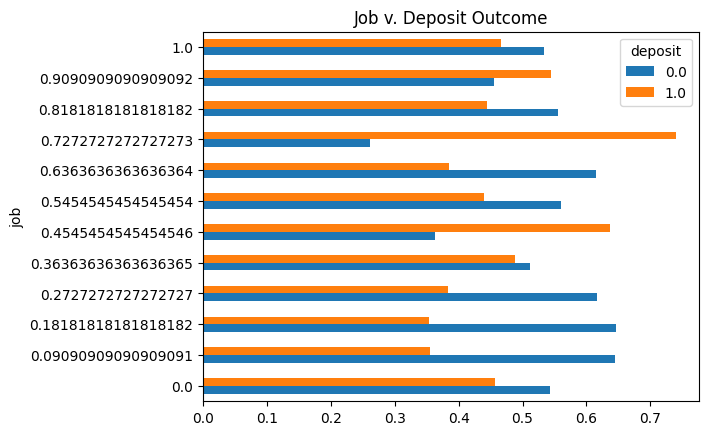

In [10]:
(df1
.groupby(['job'])
.deposit #y
.value_counts(normalize=True)
.unstack()
.plot
.barh(title='Job v. Deposit Outcome')
);

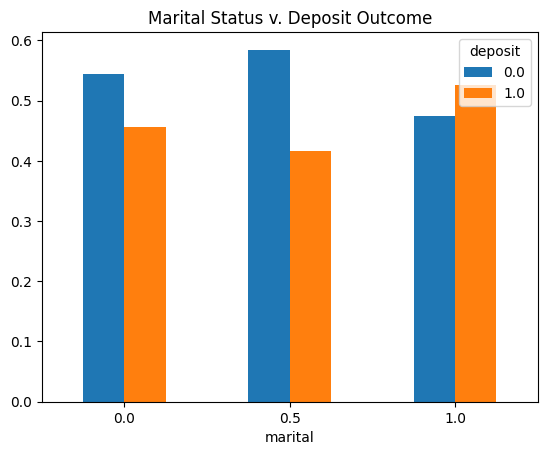

In [11]:
(df1
.groupby(['marital'])
.deposit #y
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='Marital Status v. Deposit Outcome', rot='horizontal')
);

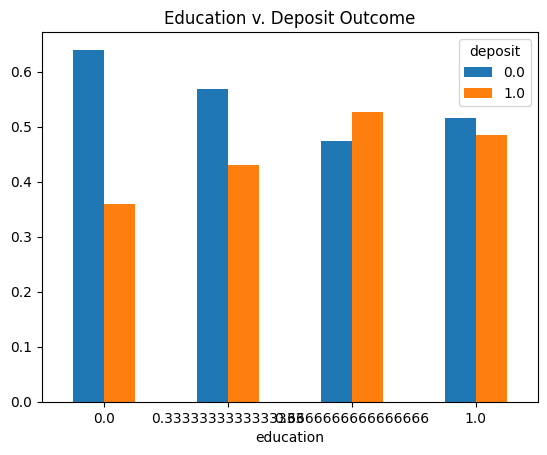

In [12]:
(df1
.groupby(['education'])
.deposit #y
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='Education v. Deposit Outcome', rot='horizontal')
);

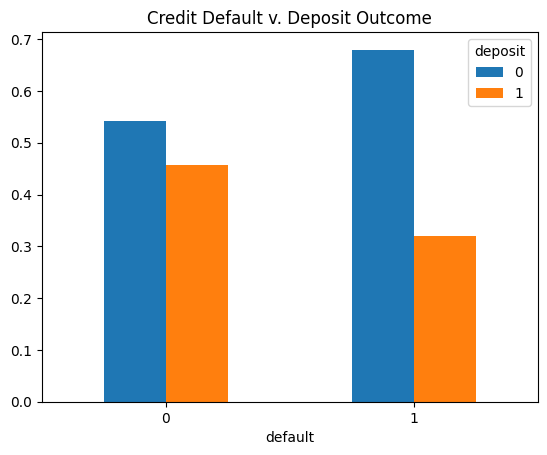

In [13]:
(df
.groupby(['default'])
.deposit #y
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='Credit Default v. Deposit Outcome', rot='horizontal')
);

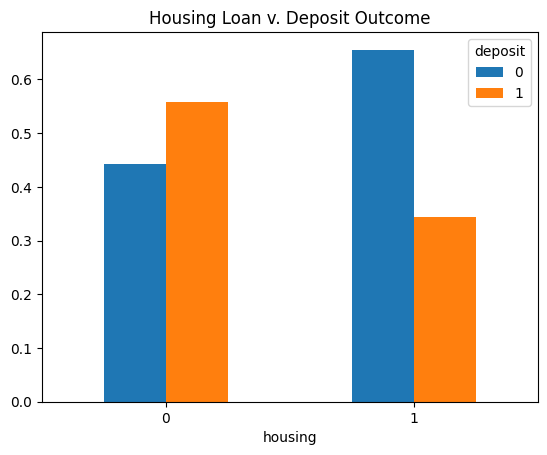

In [14]:
(df
.groupby(['housing'])
.deposit #y
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='Housing Loan v. Deposit Outcome', rot='horizontal')
);

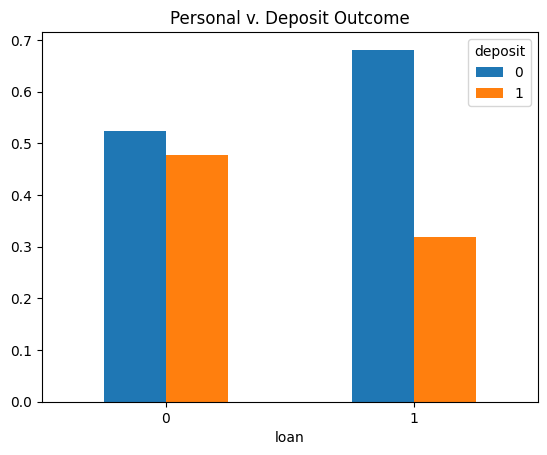

In [15]:
(df
.groupby(['loan'])
.deposit #y
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='Personal v. Deposit Outcome', rot='horizontal')
);

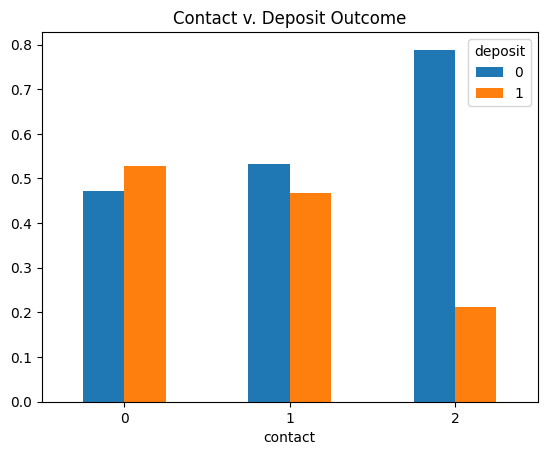

In [16]:
(df
.groupby(['contact'])
.deposit #y
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='Contact v. Deposit Outcome', rot='horizontal')
);

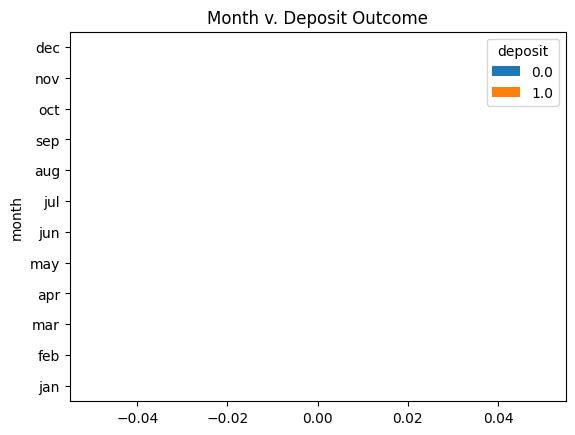

In [17]:
(df1
.groupby(['month'])
.deposit #y
.value_counts(normalize=True)
.unstack()
.reindex(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
.plot
.barh(title='Month v. Deposit Outcome', rot='horizontal')
);

In [18]:
(df1
.select_dtypes('int')
.corr(method='spearman')
.style
.background_gradient(cmap="viridis", axis=None)
)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns=['deposit']),
 df1[['deposit']].values.ravel(),
 test_size=0.2,
random_state=42)

In [33]:
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [39]:
no_classifiers = len(dict_classifiers.keys())



In [40]:
def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
#         t_start = time.clock()
        classifier.fit(X_train, Y_train)
#         t_end = time.clock()
#         t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
#         df_results.loc[count,'training_time'] = t_diff
#         if verbose:
#             print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results